In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
train_data = pd.read_csv('FINBERT-allData (1).csv', header=[0], encoding = "ISO-8859-1")
train_data.head(5)

,Description,Semantic
0,"According to Gran , the company has no plans t...",neutral
1,Technopolis plans to develop in stages an area...,neutral
2,The international electronic industry company ...,neutral
3,With the new production plant the company woul...,positive
4,According to the company 's updated strategy f...,positive


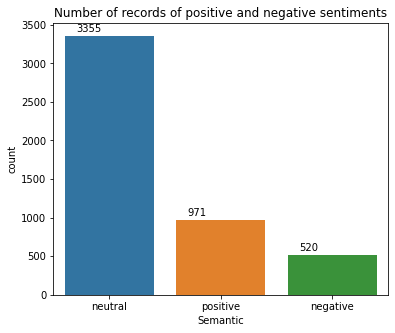

In [2]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.figure(figsize=(6,5))
plt.title("Number of records of positive and negative sentiments")
plot = sn.countplot(x = 'Semantic', data=train_data)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+0.1 ,p.get_height()+50))

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorize = CountVectorizer()
feature_vector =  count_vectorize.fit(train_data.Description)
features = feature_vector.get_feature_names()
print("total number of features: ", len(features))

total number of features:  10064


In [4]:
import random
random.sample(features,10)

['codetermination',
 'winders',
 'disappointing',
 'will',
 'handling',
 'firstalert',
 'orion',
 'batam',
 'self',
 'expertise']

In [5]:
train_ds_features = count_vectorize.transform(train_data.Description)
type(train_ds_features)

scipy.sparse.csr.csr_matrix

In [6]:
train_ds_features.getnnz()

86327

In [7]:
print("Density of the matrix: ", train_ds_features.getnnz()*100/
               (train_ds_features.shape[0]*train_ds_features.shape[1]))

Density of the matrix:  0.177007884167822


In [8]:
train_ds_df = pd.DataFrame(train_ds_features.todense())
train_ds_df.columns = features
train_data[0:1]

,Description,Semantic
0,"According to Gran , the company has no plans t...",neutral


Text(0, 0.5, 'Density')

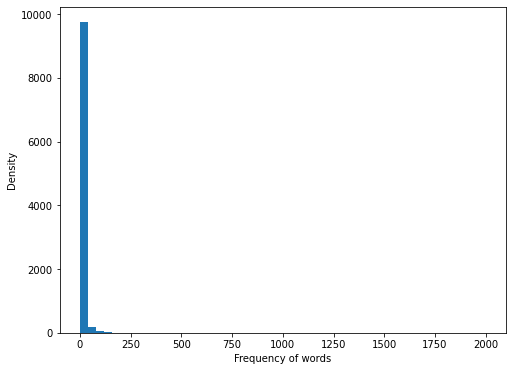

In [9]:
features_counts = np.sum(train_ds_features.toarray(),axis=0)
features_counts_df = pd.DataFrame(dict(features = features, counts = features_counts))
plt.figure(figsize=(8,6))
plt.hist(features_counts_df.counts, bins=50, range=(0,2000))
plt.xlabel("Frequency of words")
plt.ylabel('Density')

In [10]:
len(features_counts_df[features_counts_df.counts==1])

5101

In [11]:
count_vectorizer =  CountVectorizer(max_features=1000)
feature_vector = count_vectorizer.fit(train_data.Description)
features = feature_vector.get_feature_names()
train_ds_features = count_vectorizer.transform(train_data.Description)
features_counts =  np.sum(train_ds_features.toarray(),axis=0)
features_counts = pd.DataFrame(dict(features = features, counts = features_counts))
features_counts.sort_values('counts', ascending=False)[0:15]

,features,counts
892,the,6069
603,of,3215
433,in,2984
108,and,2596
906,to,2523
374,for,1152
332,eur,1018
463,is,930
209,company,851
977,will,850


In [12]:
from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS
print("Few stop words: ", list(my_stop_words)[0:10])

Few stop words:  ['wherein', 'de', 'although', 'besides', 'often', 'against', 'latter', 'therefore', 'either', 'why']


In [13]:
train_ds_df = pd.DataFrame(train_ds_features.todense())
train_ds_df.columns = features
train_ds_df['Semantic'] = train_data.Semantic

In [14]:
count_vectorizer =  CountVectorizer(stop_words= my_stop_words, max_features= 1000)
feature_vector =  count_vectorizer.fit(train_data.Description)
train_ds_features =  count_vectorizer.transform(train_data.Description)
features = feature_vector.get_feature_names()
features_counts = np.sum(train_ds_features.toarray(), axis = 0)
features_counts = pd.DataFrame(dict(features =  features, counts = features_counts))
features_counts.sort_values("counts", ascending= False)[0:15]

,features,counts
348,eur,1018
207,company,851
799,said,545
382,finnish,524
578,mn,515
802,sales,455
574,million,440
596,net,413
724,profit,410
996,year,395


In [15]:
from nltk.stem.snowball import PorterStemmer
stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()
def stemmed_words(doc):
   stemmed_words = [stemmer.stem(w) for w in analyzer(doc)]
   non_stop_words = [word for word in stemmed_words if not my_stop_words]
   return non_stop_words

In [16]:
count_vectorizer =  CountVectorizer(stop_words= my_stop_words, max_features= 1000)
feature_vector =  count_vectorizer.fit(train_data.Description)
train_ds_features =  count_vectorizer.transform(train_data.Description)
features = feature_vector.get_feature_names()
features_counts = np.sum(train_ds_features.toarray(), axis = 0)
features_counts = pd.DataFrame(dict(features =  features, counts = features_counts))
features_counts.sort_values("counts", ascending= False)[0:15]

,features,counts
348,eur,1018
207,company,851
799,said,545
382,finnish,524
578,mn,515
802,sales,455
574,million,440
596,net,413
724,profit,410
996,year,395


In [17]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y =  train_test_split(train_ds_features, train_data.Semantic, 
                                                     test_size = 0.2, random_state = 0)

In [20]:
from sklearn.naive_bayes import BernoulliNB
nb_clf = BernoulliNB()
nb_clf.fit(train_x.toarray(), train_y)

BernoulliNB()

In [21]:
test_ds_predicted = nb_clf.predict(test_x.toarray())


In [22]:
from sklearn import metrics
print(metrics.classification_report(test_y,test_ds_predicted))

              precision    recall  f1-score   support

    negative       0.42      0.54      0.47       100
     neutral       0.84      0.91      0.87       666
    positive       0.66      0.38      0.48       204

    accuracy                           0.76       970
   macro avg       0.64      0.61      0.61       970
weighted avg       0.76      0.76      0.75       970



In [23]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(train_x.toarray(), train_y)
test_ds_predicted =  nb_clf.predict(test_x.toarray())
print(metrics.classification_report(test_y,test_ds_predicted))

              precision    recall  f1-score   support

    negative       0.23      0.65      0.34       100
     neutral       0.88      0.45      0.60       666
    positive       0.26      0.44      0.33       204

    accuracy                           0.47       970
   macro avg       0.46      0.51      0.42       970
weighted avg       0.68      0.47      0.51       970



In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [27]:
lr_clf = LogisticRegression()
lr_clf.fit(train_x.toarray(), train_y)
test_ds_predicted =  lr_clf.predict(test_x.toarray())
print(metrics.classification_report(test_y,test_ds_predicted))

              precision    recall  f1-score   support

    negative       0.71      0.52      0.60       100
     neutral       0.83      0.94      0.88       666
    positive       0.74      0.51      0.60       204

    accuracy                           0.81       970
   macro avg       0.76      0.66      0.69       970
weighted avg       0.80      0.81      0.79       970



In [56]:
rf_clf = RandomForestClassifier()
rf_clf.fit(train_x.toarray(), train_y)
test_ds_predicted =  rf_clf.predict(test_x.toarray())
print(metrics.classification_report(test_y,test_ds_predicted))

              precision    recall  f1-score   support

    negative       0.66      0.57      0.61       100
     neutral       0.85      0.92      0.88       666
    positive       0.71      0.56      0.63       204

    accuracy                           0.81       970
   macro avg       0.74      0.68      0.71       970
weighted avg       0.80      0.81      0.80       970



In [57]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(train_x.toarray(), train_y)
test_ds_predicted =  knn_clf.predict(test_x.toarray())
print(metrics.classification_report(test_y,test_ds_predicted))

              precision    recall  f1-score   support

    negative       0.51      0.35      0.41       100
     neutral       0.77      0.96      0.86       666
    positive       0.68      0.22      0.33       204

    accuracy                           0.74       970
   macro avg       0.65      0.51      0.53       970
weighted avg       0.72      0.74      0.70       970

